In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask

In [2]:
with open('images/train/_annotations.coco.json') as f:
    coco_data =json.load(f)

In [3]:
coco_data

{'info': {'year': '2025',
  'version': '1',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2025-06-06T17:53:44+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/licenses/by/4.0/',
   'name': 'CC BY 4.0'}],
 'categories': [{'id': 0, 'name': 'objects', 'supercategory': 'none'},
  {'id': 1, 'name': 'objects', 'supercategory': 'objects'}],
 'images': [{'id': 0,
   'license': 1,
   'file_name': 'premium_photo-1678483692858-d9ca6e9c67f9_jpeg.rf.99a4b99e5c7a9ef2500a338202b6fd0c.jpg',
   'height': 640,
   'width': 640,
   'date_captured': '2025-06-06T17:53:44+00:00',
   'extra': {'name': 'premium_photo-1678483692858-d9ca6e9c67f9.jpeg'}},
  {'id': 1,
   'license': 1,
   'file_name': 'branches-of-blooming-white-magnolia-and-blue-tropical-morpho_jpg.rf.f5637e572e0383f74caa0382ac8034b9.jpg',
   'height': 640,
   'width': 640,
   'date_captured': '2025-06-06T17:53:44+00:0

In [4]:
image_info = coco_data['images'][0]
image_info

{'id': 0,
 'license': 1,
 'file_name': 'premium_photo-1678483692858-d9ca6e9c67f9_jpeg.rf.99a4b99e5c7a9ef2500a338202b6fd0c.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2025-06-06T17:53:44+00:00',
 'extra': {'name': 'premium_photo-1678483692858-d9ca6e9c67f9.jpeg'}}

In [5]:
image_path=f'{image_info['file_name']}'
image_path

'premium_photo-1678483692858-d9ca6e9c67f9_jpeg.rf.99a4b99e5c7a9ef2500a338202b6fd0c.jpg'

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

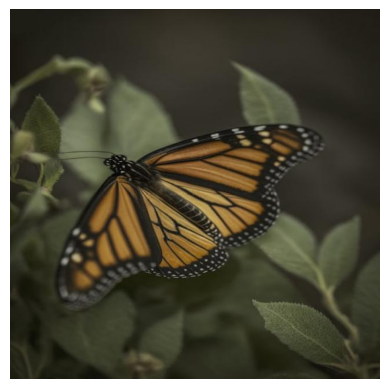

In [6]:
image=cv2.imread(f'images/train/{image_path}')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')

In [7]:
coco_data['annotations'][0]['image_id']

0

In [8]:
annotation = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_info['id']]
annotation

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [81, 199, 457.956, 317.151],
  'area': 145241.216,
  'segmentation': [[459.378,
    302.908,
    490.667,
    270.623,
    503.467,
    262.077,
    529.067,
    252.582,
    539.022,
    243.086,
    539.022,
    223.145,
    531.911,
    213.65,
    506.311,
    202.255,
    463.644,
    199.407,
    422.4,
    201.306,
    386.844,
    206.053,
    308.622,
    225.045,
    247.467,
    246.884,
    219.022,
    264.926,
    207.644,
    263.976,
    193.422,
    252.582,
    179.2,
    251.632,
    167.822,
    257.329,
    163.556,
    265.875,
    179.2,
    283.917,
    156.444,
    307.656,
    128,
    348.487,
    100.978,
    395.015,
    85.333,
    437.745,
    81.067,
    483.323,
    92.444,
    506.113,
    109.511,
    516.558,
    126.578,
    516.558,
    164.978,
    494.718,
    190.578,
    469.08,
    226.133,
    453.887,
    287.289,
    465.282,
    321.422,
    462.433,
    354.133,
    452.938,
    37

In [9]:
annotation[0]['segmentation'][0]

[459.378,
 302.908,
 490.667,
 270.623,
 503.467,
 262.077,
 529.067,
 252.582,
 539.022,
 243.086,
 539.022,
 223.145,
 531.911,
 213.65,
 506.311,
 202.255,
 463.644,
 199.407,
 422.4,
 201.306,
 386.844,
 206.053,
 308.622,
 225.045,
 247.467,
 246.884,
 219.022,
 264.926,
 207.644,
 263.976,
 193.422,
 252.582,
 179.2,
 251.632,
 167.822,
 257.329,
 163.556,
 265.875,
 179.2,
 283.917,
 156.444,
 307.656,
 128,
 348.487,
 100.978,
 395.015,
 85.333,
 437.745,
 81.067,
 483.323,
 92.444,
 506.113,
 109.511,
 516.558,
 126.578,
 516.558,
 164.978,
 494.718,
 190.578,
 469.08,
 226.133,
 453.887,
 287.289,
 465.282,
 321.422,
 462.433,
 354.133,
 452.938,
 375.467,
 434.896,
 376.889,
 415.905,
 408.178,
 405.46,
 442.311,
 386.469,
 453.689,
 374.125,
 466.489,
 352.285,
 459.378,
 302.908]

In [10]:
len(annotation[0]['segmentation'][0])

82

In [11]:
np.reshape(annotation[0]['segmentation'][0],(len(annotation[0]['segmentation'][0])//2,2))


array([[459.378, 302.908],
       [490.667, 270.623],
       [503.467, 262.077],
       [529.067, 252.582],
       [539.022, 243.086],
       [539.022, 223.145],
       [531.911, 213.65 ],
       [506.311, 202.255],
       [463.644, 199.407],
       [422.4  , 201.306],
       [386.844, 206.053],
       [308.622, 225.045],
       [247.467, 246.884],
       [219.022, 264.926],
       [207.644, 263.976],
       [193.422, 252.582],
       [179.2  , 251.632],
       [167.822, 257.329],
       [163.556, 265.875],
       [179.2  , 283.917],
       [156.444, 307.656],
       [128.   , 348.487],
       [100.978, 395.015],
       [ 85.333, 437.745],
       [ 81.067, 483.323],
       [ 92.444, 506.113],
       [109.511, 516.558],
       [126.578, 516.558],
       [164.978, 494.718],
       [190.578, 469.08 ],
       [226.133, 453.887],
       [287.289, 465.282],
       [321.422, 462.433],
       [354.133, 452.938],
       [375.467, 434.896],
       [376.889, 415.905],
       [408.178, 405.46 ],
 

In [12]:
mask = np.zeros((image_info['height'],image_info['width']),dtype=np.uint8)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

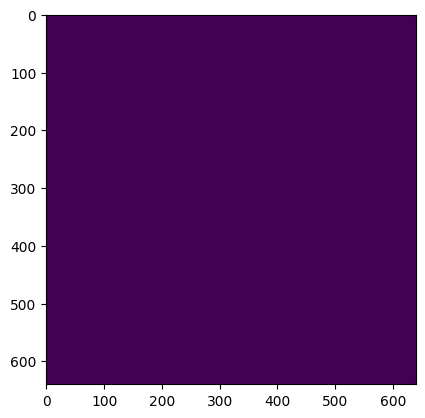

In [13]:
plt.imshow(mask)

fillPoly() function of OpenCV is used to draw filled polygons like rectangle, triangle, pentagon over an image. This function takes inputs of an image and endpoints of Polygon and color.


Syntax: cv2.fillpoly(Image,End_Points,Color)


Parameter:


Image: This is image on which we want draw filled polygon
End_Points: Points of polygon(for triangle 3 end points, for rectangle 4 end points will be there)
Color: It specifies the color of polygon

In [14]:
def create_binary_mask(segmentations,image_height,image_width):
    mask = np.zeros((image_height,image_width),dtype=np.uint8)

    for seg in segmentations:
        poly = np.reshape(seg,(len(seg)//2,2)) 
        cv2.fillPoly(mask,[np.int32(poly)],1)
    return mask

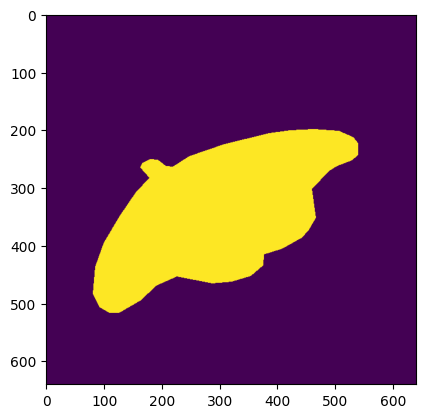

In [15]:
m=create_binary_mask(annotation[0]['segmentation'],640,640)
plt.imshow(m)

In [16]:
# can't get why to do this
for ann in annotation:

    binary_mask=create_binary_mask(ann['segmentation'],image_info['height'],image_info['width'])
    mask= np.maximum(mask,binary_mask)

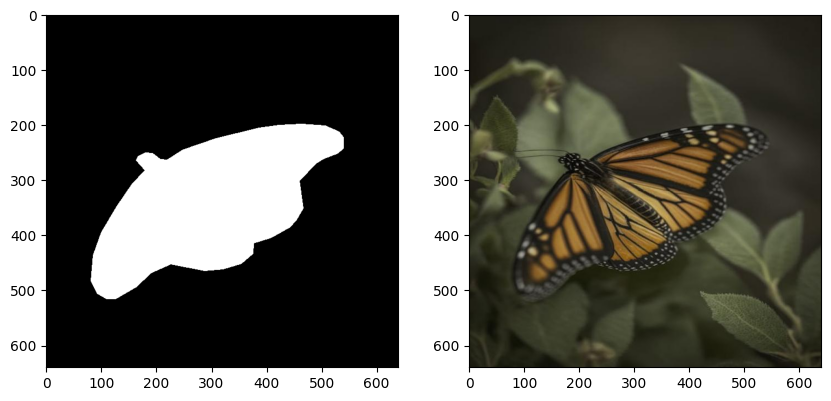

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(mask,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(image)

### Before Saving image scale it (*255) so thay when we do cv2.imwrite it normalise the image and we get our original image

In [18]:
mask = mask*255

cv2.imwrite('images/masked_image.png',mask)

True